<div style="display: flex; align-items: center;">
    <img src="static/logo_rs.png" width="120" height="120">
    <h1> Progetto SMDA - User interest Recommendation System </h1>
</div>

<p>
    Questo sistema di raccomandazione è frutto delle conoscenze acquisite al corso di Social Media Data Analisys AA 2023-2024. Si pone come obiettivo quello di "Raccomandare" persone simili tra loro in base ai dati presi in esame.
</p>

<h2>Indice</h2>
<ol>
    <li><a href="#teoria">Teoria</a>
    <li><a href="#introduzione">Introduzione ai dati</a>
    <li><a href="#analisi">Analisi dei dati</a>
    <li><a href="#sistema">Sistema di raccomandazione</a>
    <li><a href="#risultati">Risultati</a>
    <li><a href="#conclusione">Conclusione</a>
</ol>

<section id="teoria">
    <h1>1. Teoria</h1>
</section>

<section id="introduzione">
    <h1>2. Introduzione ai dati</h1>
</section>

<p>
I dati utilizzati per questo sistema sono stati ottenuti da un dataset esistente acquisito da Kaggle. I dati sono stati precedentemente puliti e organizzati secondo le necessità del progetto. Il dataset originale conteneva valori di analisi effettuati dagli aiutori, che sono stati rimossi poiché non inerenti al lavoro svolto in questo progetto.
</p>
<p>
Il sistema di raccomandazione che segue è un sistema Collaborative Filtering di tipo User-User.
</p>
<p>
Il dataset contiene le seguenti colonne:
<ul>
    <li><b>Gender</b>: Genere dell' utente: Uomo (0) - Donna (1)</li>
    <li><b>Age</b>: Età dell'utente<//li>
    <li><b>Field</b>: Campo professionale</li>
    <li><b>From</b>: Provenienza</li>
    <li><b>Income</b>: Reddito</li>
    <li><b>Career</b>: Occupazione lavorativa</li>
</ul>
<p>
I seguenti campi riguardano le valutazioni in scala da 0 a 10 date dagli utenti su l'importanza di alcune caratteristiche di un possibile partner
</p>
<ul>
    <li><b>Attr</b>: Importanza Attrattività</li>              
    <li><b>Sinc</b>: Importanza Sincerità </li>
    <li><b>Intel</b>: Importanza Intelligenza</li>
    <li><b>Fun</b>: Importanza Simpatia</li>
    <li><b>Amb</b>: Importanza Ambizione</li>
    <li><b>Shar</b>: Importanza Condivisione degli stessi interessi</li>
</ul>
<p>
I seguenti campi invece riguardano gli interessi in alcuni ambiti da parte degli utenti, anche questi valutati da una scala di importanza che va da 0 a 10
</p>
<ul>
    <li><b>Sports</b>: Quanto è importante praticare sport? </li>
    <li><b>Exercise</b>: Quanto ti piace fare esercizio fisico?</li>
    <li><b>Dining</b>: Quanto ti piace cenare fuori?</li>
    <li><b>Museums</b>: Quanto ti piace partecipare a mostre o eventi?</li>
    <li><b>Art</b>: Quanto ti piace l'arte?</li>
    <li><b>Hiking</b>: Quanto è importante fare Hiking?</li>
    <li><b>Gaming</b>: Quanto ti piacciono i videogiochi?</li>
    <li><b>Clubbing</b>: Quanto ti piace andare a ballare in discoteca?</li>
    <li><b>Reading</b>: Quanto ti piace leggere?</li>
    <li><b>Tv</b>: Quanto ti piace guardare la tv?</li>
    <li><b>Theater</b>: Quanto ti piace andare al cinema</li>
    <li><b>Movies</b>: Quanto ti piace guardare film?</li>
    <li><b>Concerts</b>: Quanto ti piace andare ai concerti?</li>
    <li><b>Music</b>: Quanto ti piace la musica?</li>
    <li><b>Shopping</b>:Quanto ti piace andare a fare shopping?</li>
    <li><b>Yoga</b>: Quanto ti piace fare Yoga?</li>
</ul>
</p>

In [82]:
import pandas as pd

#caricamento del dataset
path = 'datasets/data.csv'
data = pd.read_csv(path)

print("INFORMAZIONI SUL DATASET")
print("-----------------------------------------")
data_info = data.info()
print("-----------------------------------------")

INFORMAZIONI SUL DATASET
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   age       8283 non-null   float64
 2   field     8315 non-null   object 
 3   from      8299 non-null   object 
 4   income    4279 non-null   object 
 5   career    8289 non-null   object 
 6   attr      8176 non-null   float64
 7   sinc      8101 non-null   float64
 8   intel     8082 non-null   float64
 9   fun       8028 non-null   float64
 10  amb       7666 non-null   float64
 11  shar      7311 non-null   float64
 12  sports    8299 non-null   float64
 13  exercise  8299 non-null   float64
 14  dining    8299 non-null   float64
 15  museums   8299 non-null   float64
 16  art       8299 non-null   float64
 17  hiking    8299 non-null   float64
 18  gaming    8299 non-null   float64
 19  cl

<section id="analisi">
    <h1>3. Analisi dei dati</h1>
</section>

## Preprocessing dei dati

Diamo un'occhiata ai dati mancanti all'interno del dataset

Considerando i primi tre risultati, quindi quelli riguardanti: Il reddito, l'importanza della condivisione degli interessi e l'importanza dell'ambizione, proseguirò nel seguente modo:

La colonna rigurdante il reddito verrà rimossa, poiché non è molto rilevante ai fini del sistema. Per le colonne 'shar' e 'amb' insime alle restanti colonne, invece, andremo ad imputare la media dei valori di ogni colonna.

In [83]:
#Rimozione colonne 'income' e 'from'
data.drop(columns=['income', 'from'], inplace=True)

#Salvataggio in un nuovo file
data.to_csv('datasets/cleaned_data.csv', index=False)

### Controllo dei dati mancanti sul nuovo dataset

I dati mancanti non sono più un problema.

### Normalizzazione dei dati

Al fine di migliorare la qualità dei dati procederemo ad una normalizzazione dei valori che vanno da 0 a 10.    
Non verrà normalizzata l'eta per ragioni relative alla leggibilità dei dati, e perché non reputo importante normalizzarla.

In [89]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('datasets/cleaned_data.csv')
# Esclusione delle colonne age e gender
columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])

# Inizializzazione dello StandardScaler per la zero mean normalization
scaler = StandardScaler()

# Applicazione della standardizzazione ai dati
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Salvataggio del DataFrame normalizzato in un file CSV
data.to_csv('datasets/normalized_data.csv', index=False)


## Clustering


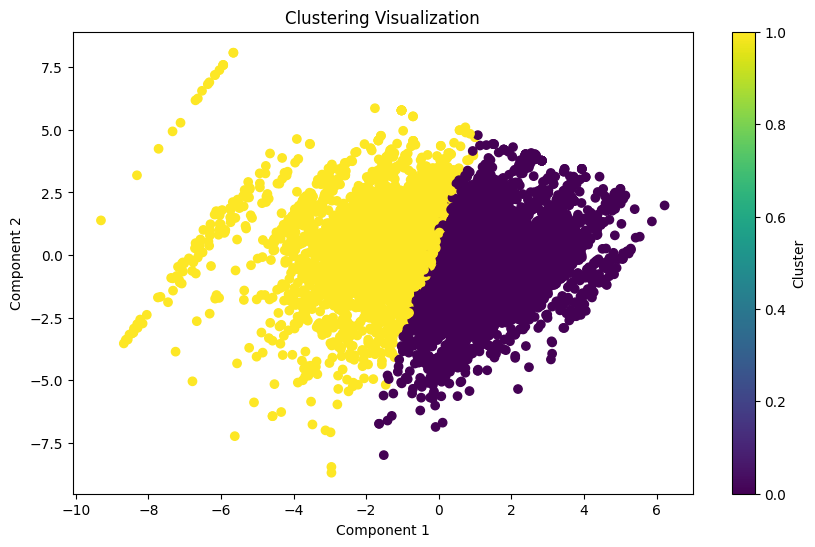

In [87]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/normalized_data.csv')

columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])
numeric_data = data[columns_to_standardize]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA(n_components=16)
pca_result = pca.fit_transform(scaled_data)



k=2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

data['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


data = pd.read_csv('datasets/normalized_data.csv')


columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])
numeric_data = data[columns_to_standardize]

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Silhouette Score
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.11272577338128474


<section id="sistema">
    <h1>4. Sistema di raccomandazione</h1>
</section>

<section id="risultati">
    <h1>5. Risultati</h1>
</section>

<section id="conclusione">
    <h1>6. Conclusione</h1>
</section>